## Prerequisites

Run this cell to prepare the environment. This step is obligatory.

In [ ]:
!pip install retentioneering

The full text of [Step Matrix](https://doc.retentioneering.com/release3/doc/user_guides/step_matrix.html) user guide is available on the retentioneering website.

# StepMatrix

## Step matrix definition

In [2]:
from retentioneering.eventstream import Eventstream
import pandas as pd

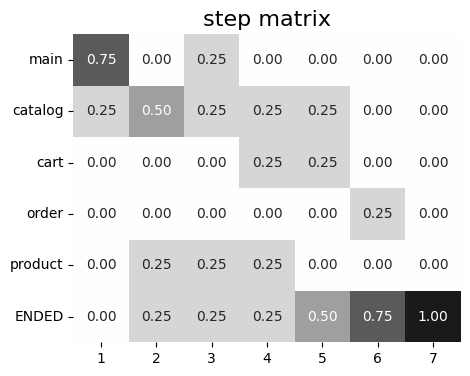

In [3]:
simple_example = pd.DataFrame(
    [
        ['user1', 'main', 0],
        ['user2', 'main', 0],
        ['user3', 'main', 0],
        ['user4', 'catalog', 0],
        ['user1', 'catalog', 1],
        ['user3', 'catalog', 1],
        ['user4', 'product', 1],
        ['user1', 'product', 2],
        ['user3', 'catalog', 2],
        ['user4', 'main', 2],
        ['user1', 'cart', 3],
        ['user3', 'product', 3],
        ['user4', 'catalog', 3],
        ['user1', 'catalog', 5],
        ['user3', 'cart', 5],
        ['user3', 'order', 6]
    ],
    columns=['user_id', 'event', 'timestamp']
)


Eventstream(simple_example).step_matrix(max_steps=7, threshold=0);

In [4]:
from retentioneering import datasets

stream = datasets.load_simple_shop()

## Basic example

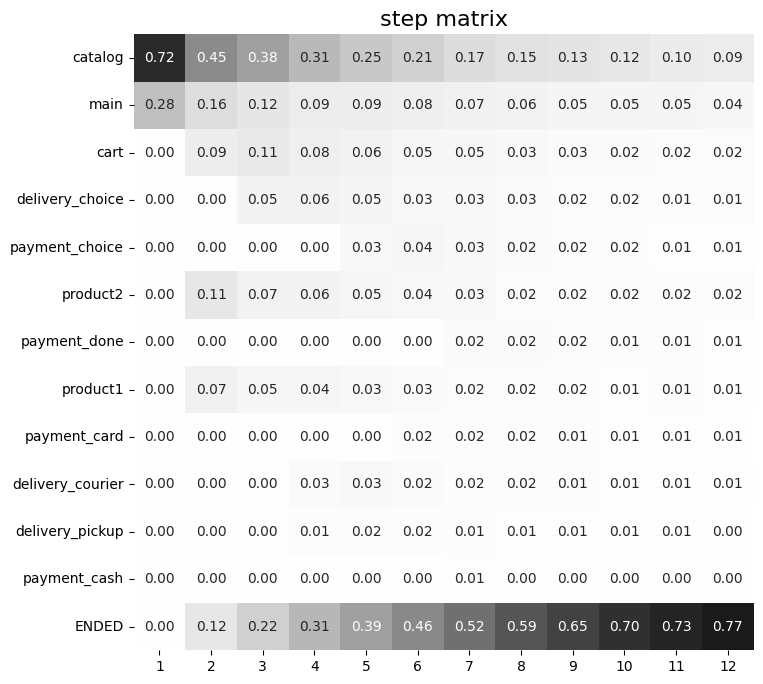

In [5]:
stream.step_matrix(max_steps=12, threshold=0)

Collapsing rare events
------------------------

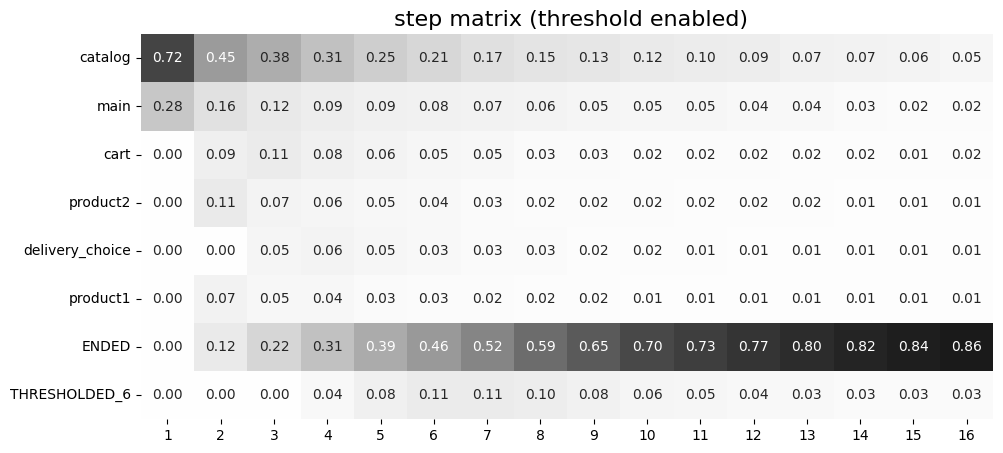

In [6]:
stream.step_matrix(max_steps=16, threshold=0.05);

## Target events analysis

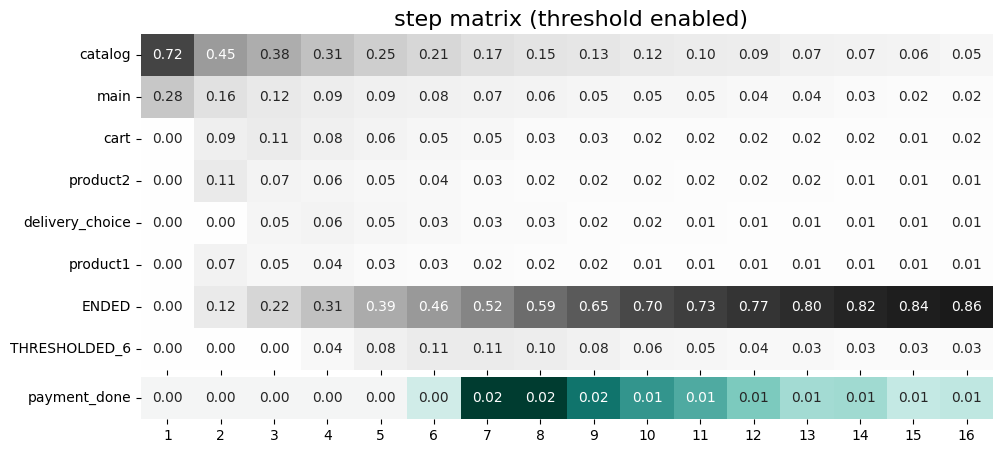

In [7]:
stream.step_matrix(
    max_steps=16,
    threshold=0.05,
    targets=['payment_done']
)

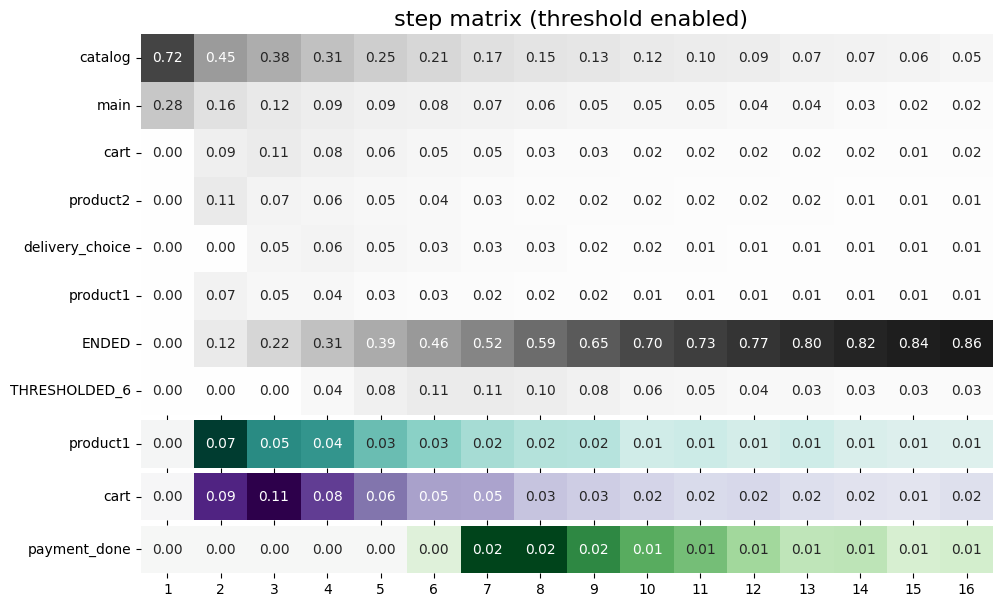

In [8]:
stream.step_matrix(
    max_steps=16,
    threshold=0.05,
    targets=['product1', 'cart', 'payment_done']
);

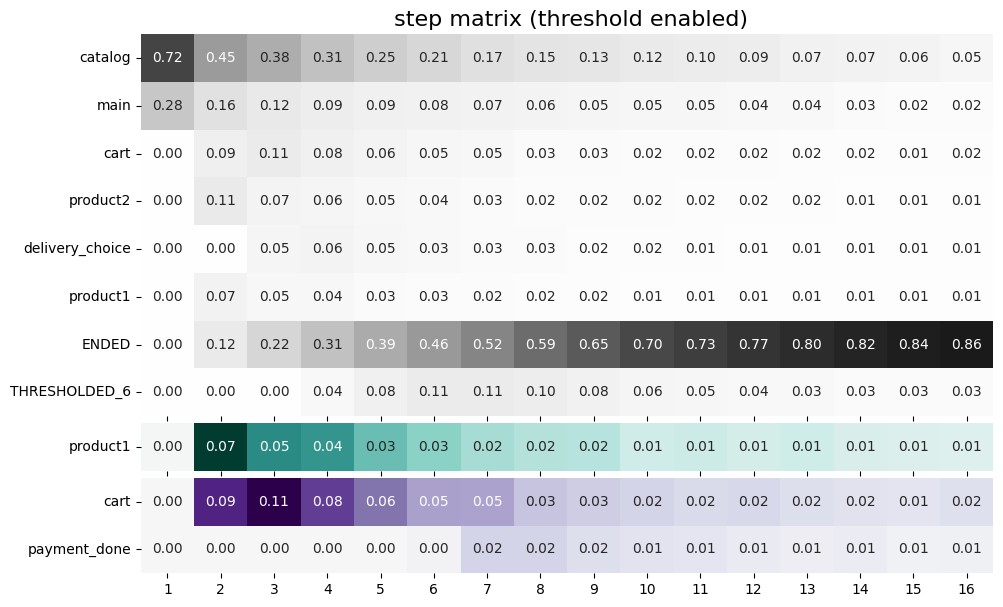

In [9]:
stream.step_matrix(max_steps=16,
    threshold=0.05,
    targets=['product1',['cart','payment_done']]);

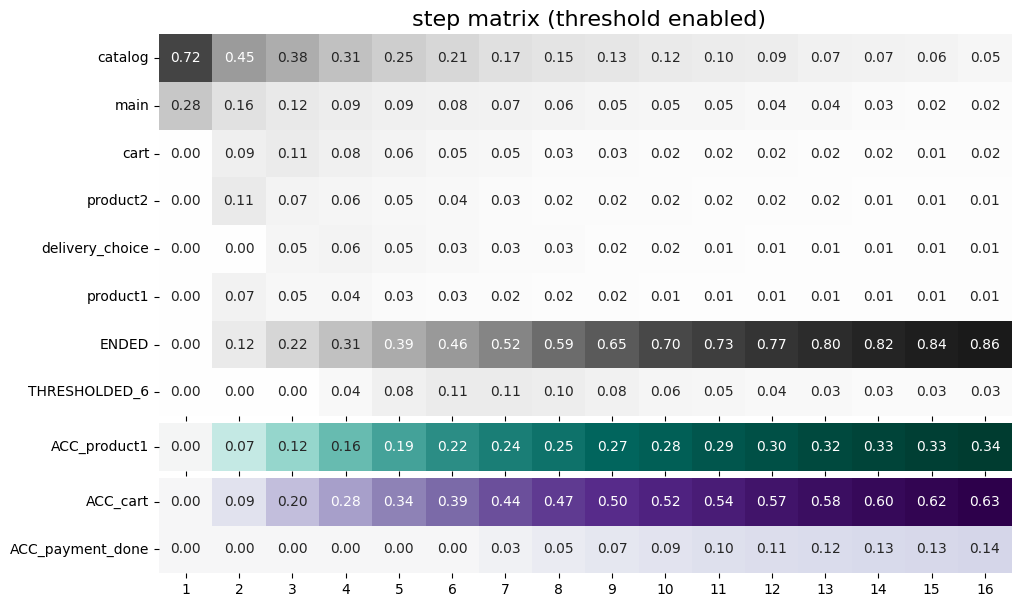

In [10]:
stream.step_matrix(
    max_steps=16,
    threshold=0.05,
    targets=['product1', ['cart', 'payment_done']],
    accumulated='only'
);

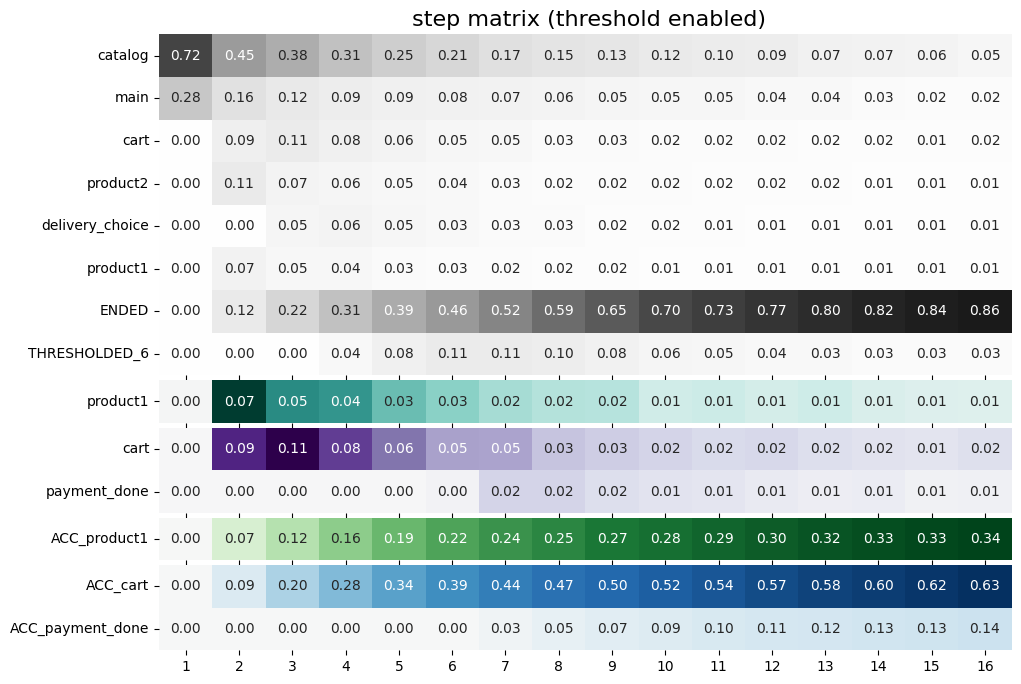

In [11]:
stream.step_matrix(
    max_steps=16,
    threshold=0.05,
    targets=['product1', ['cart', 'payment_done']],
    accumulated='both'
);

## Centered step matrix

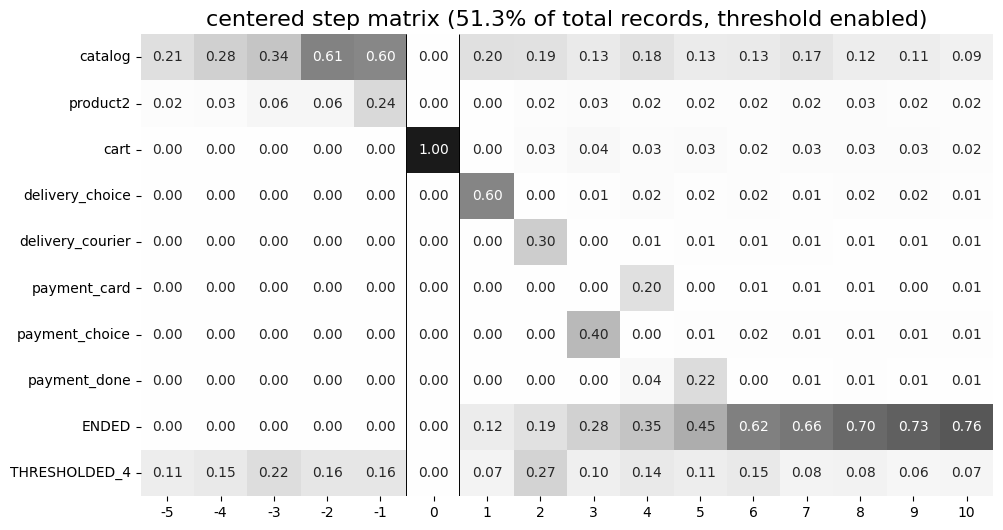

In [12]:
stream.step_matrix(
    max_steps=16,
    threshold=0.2,
    centered={
        'event': 'cart',
        'left_gap': 5,
        'occurrence': 1
    }
);

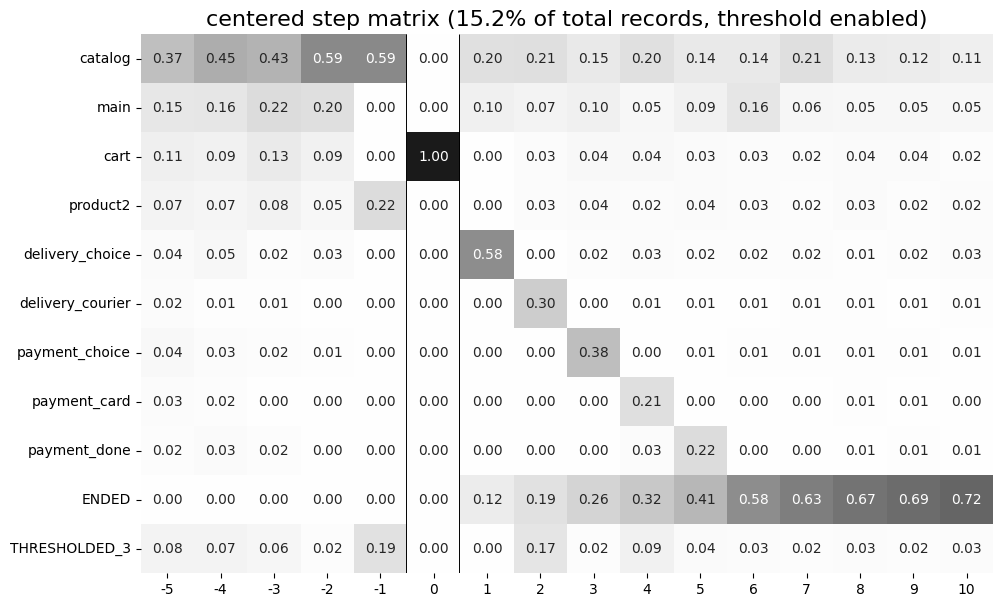

In [13]:
stream.step_matrix(
    max_steps=16,
    threshold=0.2,
    centered={
        'event': 'cart',
        'left_gap': 5,
        'occurrence': 2
    }
);

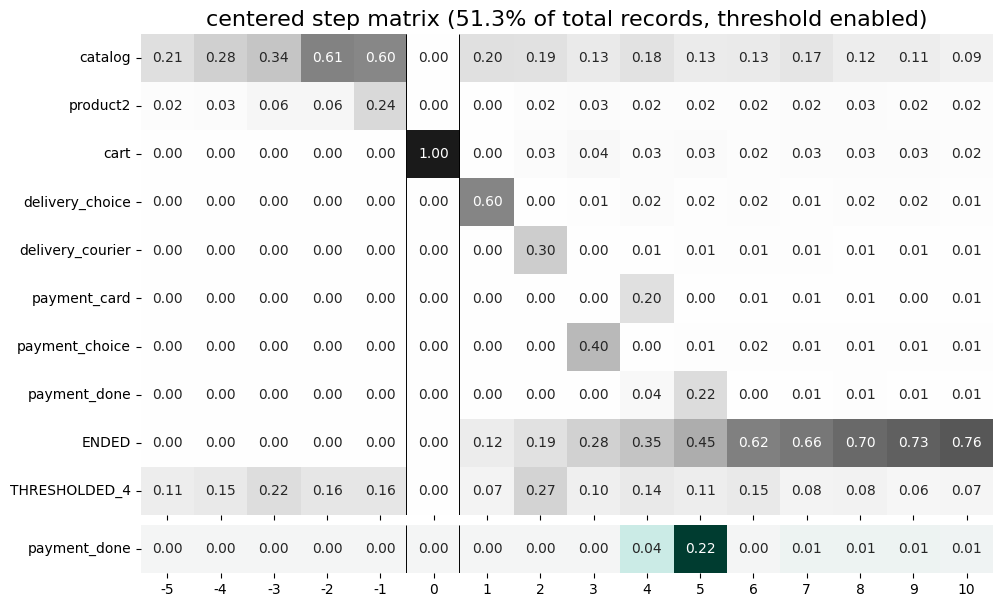

In [14]:
stream.step_matrix(
    max_steps=16,
    threshold=0.2,
    centered={
        'event': 'cart',
        'left_gap': 5,
        'occurrence': 1
    },
    targets=['payment_done']
);

## Events sorting

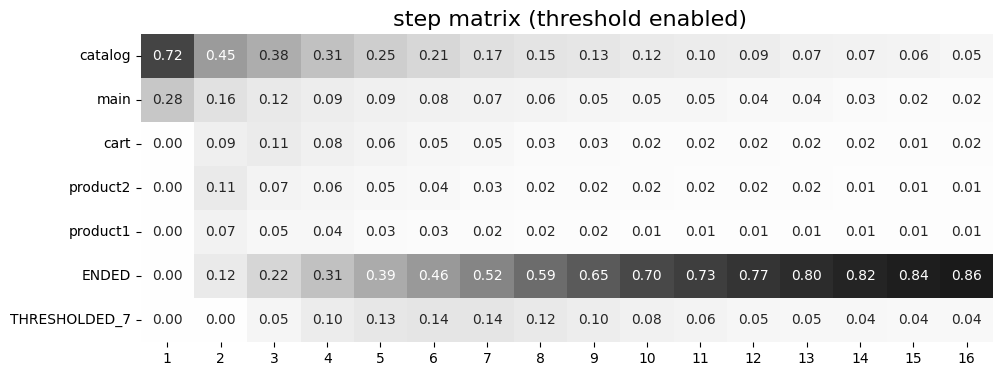

In [15]:
stream.step_matrix(max_steps=16, threshold=0.07);

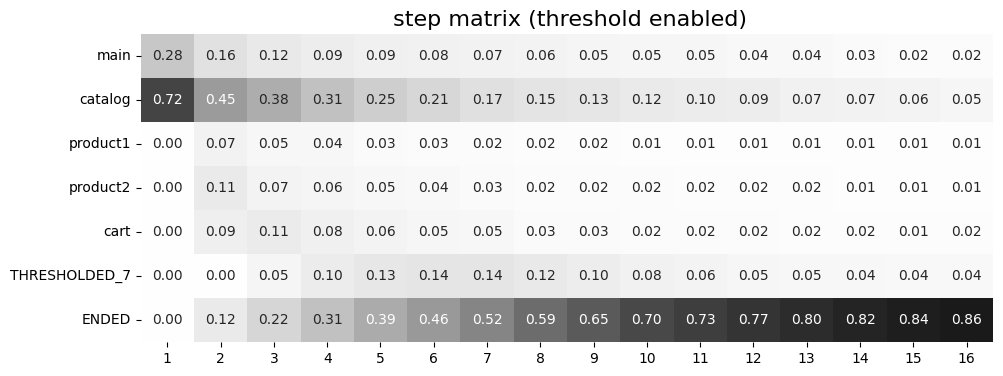

In [16]:
custom_order = [
    'main',
    'catalog',
    'product1',
    'product2',
    'cart',
    'THRESHOLDED_7',
    'ENDED'
]

stream.step_matrix(
    max_steps=16,
    threshold=0.07,
    sorting=custom_order
);

## Differential step_matrix

### Definition and general usage

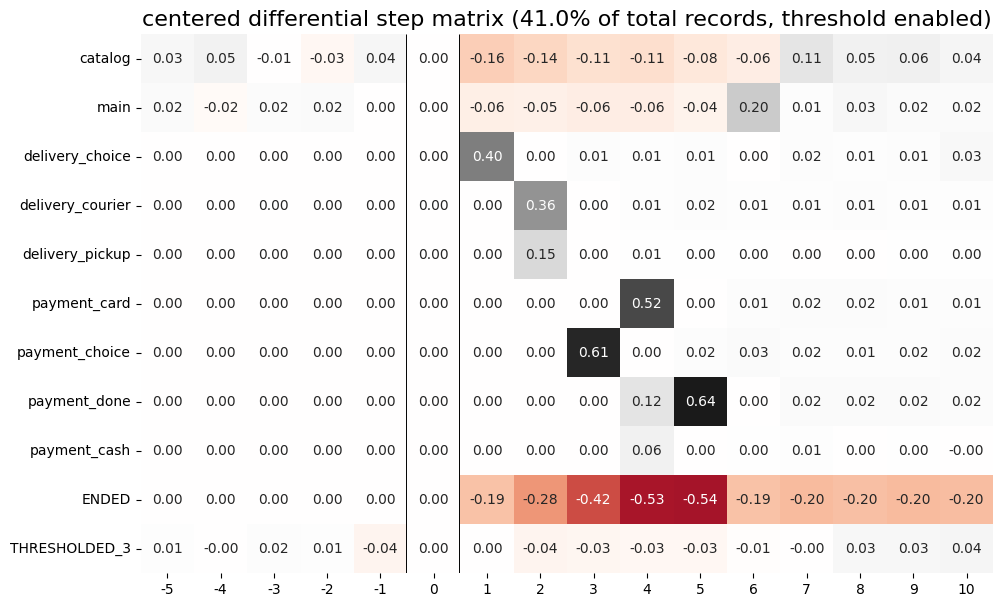

In [17]:
stream_df = stream.to_dataframe()

g1 = set(stream_df[stream_df['event'] == 'payment_done']['user_id'])
g2 = set(stream_df['user_id']) - g1

stream.step_matrix(
    max_steps=16,
    threshold=0.05,
    centered={
        'event': 'cart',
        'left_gap': 5,
        'occurrence': 1
    },
    groups=(g1, g2)
);

#### Cluster analysis

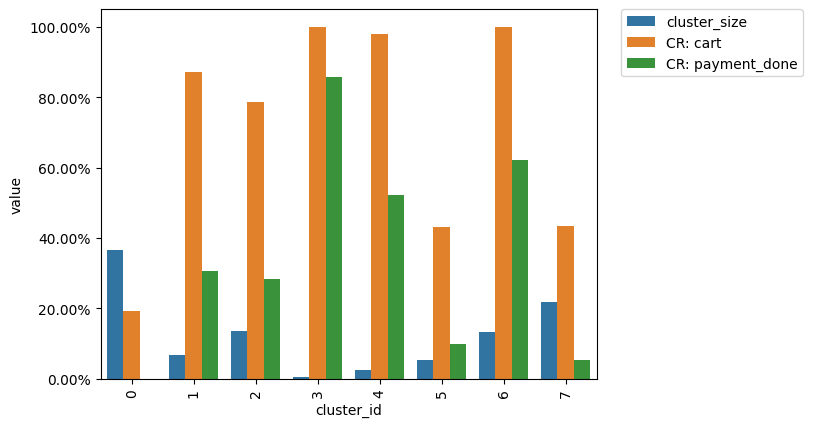

In [18]:
from retentioneering.tooling.clusters import Clusters

clusters = Clusters(eventstream=stream)
features = clusters.extract_features(feature_type='count', ngram_range=(1, 1))
clusters.fit(method='kmeans', n_clusters=8, X=features, random_state=42)
clusters.plot(targets=['payment_done', 'cart']);

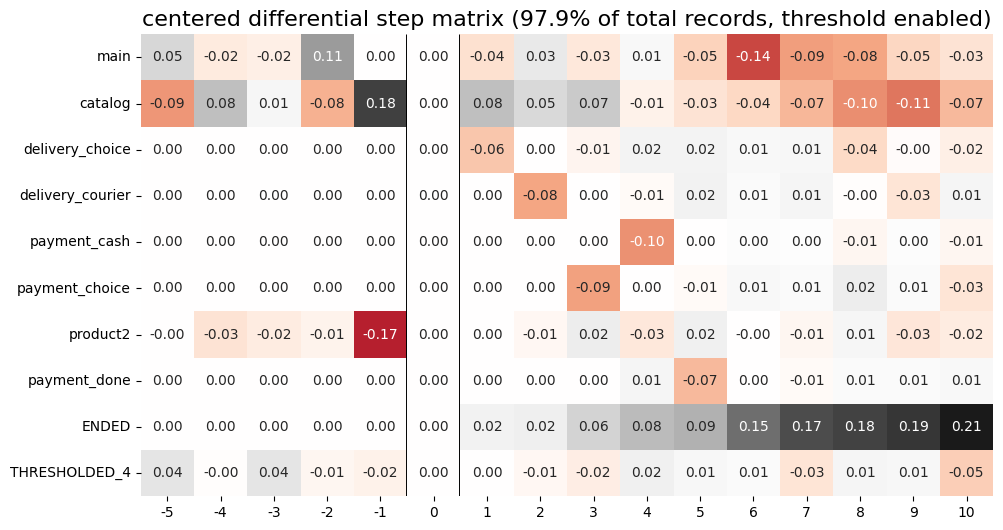

In [19]:
g1 = clusters.cluster_mapping[1]
g2 = clusters.cluster_mapping[4]

stream.step_matrix(
    max_steps=16,
    threshold = 0.05,
    centered={
        'event': 'cart',
        'left_gap': 5,
        'occurrence': 1
    },
    groups=(g1,g2)
);

## Weighting step matrix values

In [20]:
stream_with_sessions = stream.split_sessions((30, 'm'))

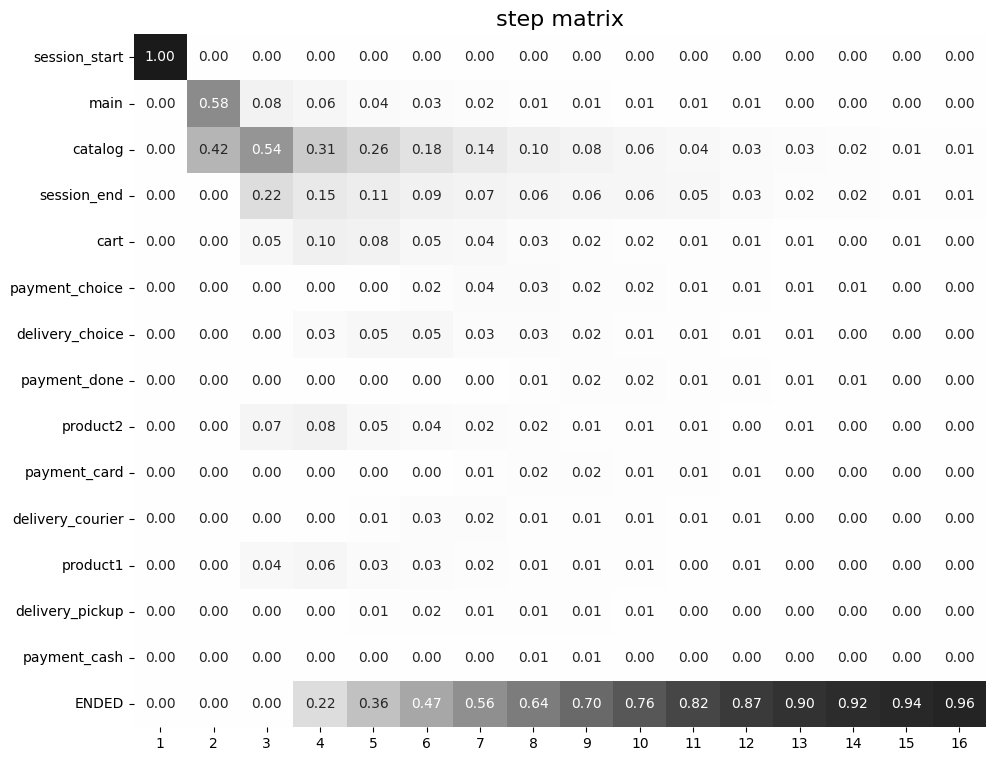

In [21]:
stream_with_sessions.step_matrix(max_steps=16, weight_col='session_id', threshold=0)

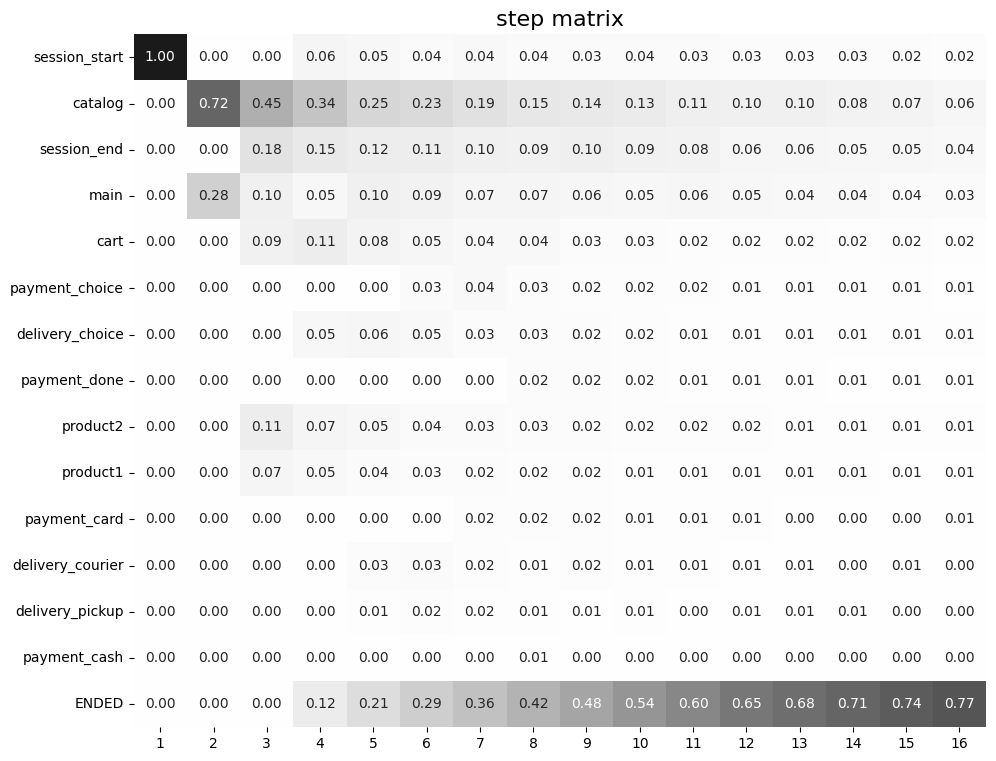

In [22]:
stream_with_sessions.step_matrix(max_steps=16, weight_col='user_id', threshold=0)

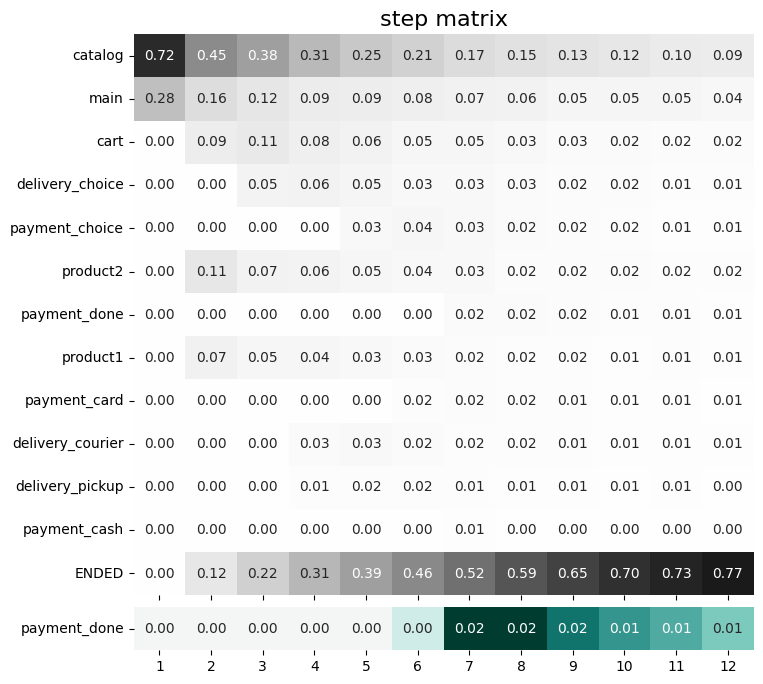

In [23]:
from retentioneering.tooling.step_matrix import StepMatrix

step_matrix = StepMatrix(stream)
step_matrix.fit(max_steps=12, targets=['payment_done'], threshold=0)
step_matrix.plot();

## Common tooling properties


### values


In [24]:
stream.step_matrix(
    max_steps=6,
    targets=['product1', ['cart', 'payment_done']],
    threshold=0,
    show_plot=False
).values[0]

,1,2,3,4,5,6
catalog,0.716076,0.445215,0.384164,0.310051,0.251400,0.211677
main,0.283924,0.162357,0.121834,0.094108,0.085311,0.079712
cart,0.000000,0.089843,0.109571,0.080778,0.064783,0.047454
delivery_choice,0.000000,0.000000,0.054119,0.061584,0.049054,0.034391
payment_choice,0.000000,0.000000,0.000000,0.000000,0.033591,0.043455
product2,0.000000,0.114370,0.065849,0.057851,0.045854,0.035724
delivery_pickup,0.000000,0.000000,0.000000,0.014396,0.016796,0.015463
delivery_courier,0.000000,0.000000,0.000000,0.025327,0.032791,0.024793
product1,0.000000,0.070115,0.045055,0.042655,0.031991,0.025860
payment_cash,0.000000,0.000000,0.000000,0.000000,0.000000,0.004799


In [25]:
stream.step_matrix(
    max_steps=6,
    targets=['product1', ['cart', 'payment_done']],
    threshold=0,
    show_plot=False
).values[1]

,1,2,3,4,5,6
product1,0.0,0.070115,0.045055,0.042655,0.031991,0.025860
cart,0.0,0.089843,0.109571,0.080778,0.064783,0.047454
payment_done,0.0,0.000000,0.000000,0.000000,0.000000,0.003999


### params


In [26]:
stream.step_matrix(
    max_steps=6,
    targets=['product1', ['cart', 'payment_done']],
    threshold=0,
    show_plot=False
).params

{'max_steps': 6,
 'weight_col': 'user_id',
 'precision': 2,
 'targets': ['product1', ['cart', 'payment_done']],
 'accumulated': None,
 'sorting': None,
 'threshold': 0,
 'centered': None,
 'groups': None}